
# Árvore binária de busca

Visualização:
- https://visualgo.net/en/bst
- https://graphviz.readthedocs.io/en/stable/api.html
- https://github.com/xflr6/graphviz/blob/master/examples/graphviz-notebook.ipynb

## **Exemplo 1**

In [ ]:
class No:
  def __init__(self, valor):
    self.valor = valor
    self.esquerda = None
    self.direita = None  

In [ ]:
def inserir(no, valor):
    
    # Se a árvore estiver vazia
    if no == None:
      novo = No(valor)  
      no = novo
    elif (valor < no.valor):
      no.esquerda = inserir(no.esquerda, valor)
    else:
      no.direita = inserir(no.direita, valor)
    return no
  

  # Raiz, esquerda, direita
def pre_ordem(no):
    if no != None:
      print(no.valor)
      pre_ordem(no.esquerda)
      pre_ordem(no.direita)

  # Esquerda, raiz, direita
def em_ordem(no):
    if no != None:
      em_ordem(no.esquerda)
      print(no.valor)
      em_ordem(no.direita)

  # Esquerda, direita, raiz
def pos_ordem(self, no):
    if no != None:
      pos_ordem(no.esquerda)
      pos_ordem(no.direita)
      print(no.valor)

def abb_retira(no, valor):
    
    if no == None:
      print('A árvore está vazia')
      return None
    elif no.valor > valor:
         no.esquerda = abb_retira(no.esquerda, valor);
    elif no.valor < valor:
         no.direita = abb_retira(no.direita, valor);
    else: #achou o nó a remover    
    
        # O nó a ser apagado é uma folha
        if (no.esquerda == None) and (no.direita == None):
             return None

        # O nó a ser apagado não possui filho na direita
        elif no.direita == None:      
             no = no.esquerda

        # O nó a ser apagado não possui filho na esquerda
        elif no.esquerda == None:
             no = no.direita

        # O nó possui dois filhos
        else:
          sucessor = no.esquerda
          while sucessor.direita != None:
                sucessor = sucessor.direita


          no.valor = sucessor.valor
          sucessor.valor = valor
          no.esquerda = abb_retira(no.esquerda, valor);
    
    return no 

def imprimeGraph(no, f):
    if no != None:
        if(no.esquerda != None):
            f.edge(str(no.valor),str(no.esquerda.valor))
            imprimeGraph(no.esquerda,f)
        if(no.direita != None):
            f.edge(str(no.valor),str(no.direita.valor))  
            imprimeGraph(no.direita,f)
    return f

### Inserção

In [ ]:
#Gera um no vazio (None)
arvore = None

#Cria uma ABB
arvore = inserir(arvore, 53)
arvore = inserir(arvore, 30)
arvore = inserir(arvore, 14)
arvore = inserir(arvore, 39)
arvore = inserir(arvore, 9)
arvore = inserir(arvore, 23)
arvore = inserir(arvore, 34)
arvore = inserir(arvore, 49)
arvore = inserir(arvore, 72)
arvore = inserir(arvore, 61)
arvore = inserir(arvore, 84)
arvore = inserir(arvore, 79)      


### Visualização

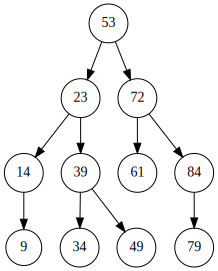

In [ ]:
import graphviz
f = graphviz.Digraph('Binary Search Tree')
f.attr(rankdir='TD', size='4')
f.attr('node', shape='circle')

### Chama a função de impressão
imprimeGraph(arvore, f)

### Remoção

In [ ]:
arvore = abb_retira(arvore, 30)

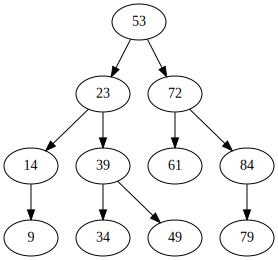

In [ ]:
### Chama a função de impressão
f.clear(True)
imprimeGraph(arvore,f)

## Desenvolver as seguintes funções em pyhton:
* altura da árvore
* profundidade de um determinado nó

## **Exemplo 2**

In [ ]:
!pip install drawtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for drawtree: filename=drawtree-0.1.2-py3-none-any.whl size=5677 sha256=c63c89d6f84f417071ab2eec4f2b8e8564c19e57cef5196ca6f16b0d7cec101d
  Stored in directory: /root/.cache/pip/wheels/b3/c5/1f/3937c1a1b0e2ff87e37bcc568d3ccdd6c1bcbdfe78ca1a10d4
Successfully built drawtree


In [ ]:
%%file ABB.c

#include <stdio.h>
#include <stdlib.h>
#include <string.h>

typedef struct arv {
  int valor;
  struct arv *esq;
  struct arv *dir;
} Arv;

void pre_ordem(Arv *raiz, FILE* f) {
  if (raiz != NULL) {    
    printf("%d\n", raiz->valor);
    fprintf(f, "%d\n",raiz->valor); 
    pre_ordem(raiz->esq,f);
    pre_ordem(raiz->dir,f);
  }
}

Arv *insereArv(Arv *raiz, int info) {
  // Caso base
  if (raiz == NULL) {
    Arv *novo = (Arv *)malloc(sizeof(Arv));
    novo->valor = info;
    novo->esq = NULL;
    novo->dir = NULL;
    return novo;
  } else {
    if (raiz->valor > info) {
      raiz->esq = insereArv(raiz->esq, info);
    } else {
      raiz->dir = insereArv(raiz->dir, info);
    }
    return raiz;
  }
}

int main() {
  FILE *fptr;
  fptr = fopen("bTree.txt", "w");
  
  if (fptr != NULL) {
    printf("Arquivo criado com sucesso!\n");
  }
  else {
    printf("Failed to create the file.\n");
    // exit status for OS that an error occurred
    return -1;
  }  
    
  Arv *raiz = NULL;
  raiz = insereArv(raiz, 10);
  raiz = insereArv(raiz, 8);
  raiz = insereArv(raiz, 30);
  raiz = insereArv(raiz, 35);
  raiz = insereArv(raiz, 2);
  raiz = insereArv(raiz, 9);
  raiz = insereArv(raiz, 15);
  raiz = insereArv(raiz, 33);
  raiz = insereArv(raiz, 22);
  pre_ordem(raiz,fptr);
  fclose(fptr);
  return 0;
}


Writing ABB.c


In [ ]:
!gcc ABB.c -o abb
!./abb

Arquivo criado com sucesso!
10
8
2
9
30
15
22
35
33


In [ ]:
!ls

abb  ABB.c  bTree.txt  sample_data


In [ ]:
## Faz a leitura da arvore gerada em C
# opening the file in read mode

# reading the file
bTree = []
with open("bTree.txt", 'r') as f:
     while True:
        line = f.readline()
         
        if not line:
            break
        
        bTree.append(int(line))

# printing the data
print(bTree)
f.close()

[10, 8, 2, 9, 30, 15, 22, 35, 33]


In [ ]:
from drawtree import draw_bst
draw_bst(bTree)

     10
     / \
    /   \
   /     \
  8      30
 / \     / \
2   9   /   \
       /     \
      15     35
       \     /
       22   33


## Construir a ABB gerada utilizando o **Exemplo 1**.
* Fazer uma função que retorna a quantidade de nós da árvore 